**Table of contents**<a id='toc0_'></a>    
- [Inferring human DFE using three commands](#toc1_)    
  - [Package structure](#toc1_1_)    
    - [File structure](#toc1_1_1_)    
    - [What it can and cannot do](#toc1_1_2_)    
  - [Load and preview the SFS](#toc1_2_)    
- [Command1: Run demographic inference](#toc2_)    
  - [Local example](#toc2_1_)    
    - [Log output](#toc2_1_1_)    
    - [File output](#toc2_1_2_)    
    - [What is a good enough demographic model for DFE inference?](#toc2_1_3_)    
- [About](#toc3_)    
  - [Disclaimer](#toc3_1_)    
  - [Citation](#toc3_2_)    
  - [Info](#toc3_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Inferring human DFE using three commands](#toc0_)

**Part1: intro and demography**

Date: 2023-03-09 22:47:35

Author: Meixi Lin

## <a id='toc1_1_'></a>[Package structure](#toc0_)


### <a id='toc1_1_1_'></a>[File structure](#toc0_)

This package provides the `varDFE` python module and the full DFE inference and comparison python API in the `workflow` folder. 

```
├── README.md
├── example
│   └── human_dfe................this example
├── pyproject.toml
├── setup.cfg
├── src..........................the source code of the varDFE package
│   ├── varDFE
│   └── varDFE.egg-info
└── workflow.....................the workflow API users will use
    ├── DFE
    └── Demography
```

Within the `workflow` folder: 

```
├── DFE
│   ├── DFE1D_gridsearch.py
│   ├── DFE1D_inferenceFIM.py
│   └── DFE1D_refspectra.py
└── Demography
    └── Demog1D_sizechangeFIM.py
```

### <a id='toc1_1_2_'></a>[What it can and cannot do](#toc0_)

It can: 

1. provide quick and easy demographic inference workflow for simple size change models.
2. use the inferred best demography to inform DFE inference. 
3. compare DFE inferred in different populations using a gridsearch approach.

It cannot: 

1. work with 2D-SFS.

## <a id='toc1_2_'></a>[Load and preview the SFS](#toc0_)

Here we do not use most of the `varDFE` functionality yet. Using `dadi`'s basic functions.

In [1]:
import varDFE
import dadi

In [2]:
synfs = dadi.Spectrum.from_file('sfs/SYN-HS100.sfs')
misfs = dadi.Spectrum.from_file('sfs/MIS-HS100.sfs')

# this spectrum is folded and non-variant sites are masked out. 
misfs

Spectrum([-- 12099.6708119663 4126.83766455737 2487.30419694048 1744.36266380784
 1318.65944635312 1044.66955159052 854.715860350597 712.476747888646
 601.768084398794 514.986337687 448.450025812849 398.800183314803
 361.598923657678 332.218015364214 307.212096367071 284.882251586424
 264.857612475557 247.266081440649 232.10662469244 219.050021574517
 207.507671244841 196.813921488429 186.495281391443 176.516436034192
 167.284688873619 159.343277969783 152.967149484326 147.965168577535
 143.805869313368 139.929047347143 136.006881171078 132.011757225409
 128.111368941573 124.508732923392 121.331242012966 118.600279035719
 116.256605272533 114.206608136505 112.36881058771 110.709350574793
 109.255579007687 108.081417810728 107.270850516081 106.87672206152
 106.891575982835 107.238272949967 107.779916036486 108.345642418155
 108.767917800069 54.4618822372481 -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- 

In [3]:
# get some basics from the sfs
print(misfs.S())
print(synfs.S())

32519.603126254
33684.452735771716


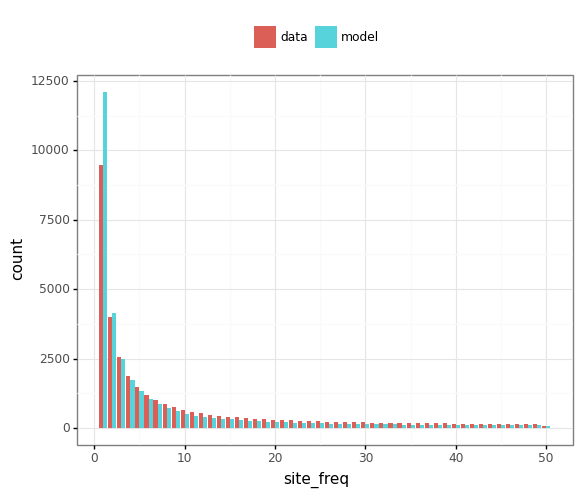

<ggplot: (373577131)>

In [4]:
# adapt a plotting function from varDFE
# here the model is missense sfs and data is synonymous sfs (you can change the naming later)
%matplotlib inline
varDFE.Misc.Plotting.ggplot_dadi_1d(outprefix = 'MIS_SYN', model = misfs, fs = synfs, yvar = 'count', returnplot=True)

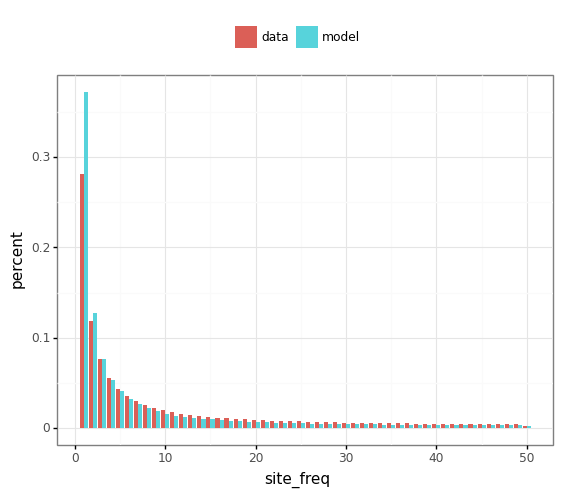

<ggplot: (373705353)>

In [5]:
# make a percentage plot
%matplotlib inline
varDFE.Misc.Plotting.ggplot_dadi_1d(outprefix = 'MIS_SYN', model = misfs, fs = synfs, yvar = 'percent', returnplot=True)

Overall there are less segregating sites for nonsynonymous mutations compared to synonymous mutations. 

The nonsynonymous mutations have more rare variants. 

# <a id='toc2_'></a>[Command1: Run demographic inference](#toc0_)

The script is [Demog1D_sizechangeFIM.py](../../workflow/Demography/Demog1D_sizechangeFIM.py). 


## <a id='toc2_1_'></a>[Local example](#toc0_)

In [6]:
%%bash
mkdir -p ./output/logs/
WORKSCRIPT='../../workflow/Demography/Demog1D_sizechangeFIM.py'

python $WORKSCRIPT -h

python $WORKSCRIPT \
--pop 'HS100' --mu '2.50E-08' --Lcds '19089129' --NS_S_scaling '2.31' --Nrun 5 \
'sfs/SYN-HS100.sfs' 'two_epoch' './output/demography/two_epoch' &> './output/logs/demography_human.log'

usage: Demog1D_sizechangeFIM.py [-h] --pop POP --mu MU --Lcds LCDS
                                --NS_S_scaling NS_S_SCALING [--Nrun NRUN]
                                [--initval INITVAL] [--mask_singleton]
                                [--impatient IMPATIENT]
                                sfs modelname outdir

Infer a 1D one_epoch or two_epoch or three_epoch or four_epoch model from a 1D
folded SFS in dadi

positional arguments:
  sfs                   path to FOLDED SFS in dadi format from easysfs (mask
                        optional)
  modelname             Demographic model to use.
  outdir                path to output directory

options:
  -h, --help            show this help message and exit
  --pop POP             population identifier, e.g. 'HS100'
  --mu MU               supply exon mutation rate in mutation/bp/gen
  --Lcds LCDS           number of called CDS sites that went into making SFS
                        (monomorphic+polymorphic)
  --NS_S_scaling NS_S_SCA

### <a id='toc2_1_1_'></a>[Log output](#toc0_)


This script gives (hopefully) all the information you need for demographic inference and comparisons: 

In the output log, it provides: 

1. Input parameters parsed: 

```
INFO:[2023-03-10 12:48:08] - Beginning execution of ../../workflow/Demography/Demog1D_sizechangeFIM.py in directory /Users/linmeixi/Lab/varDFE/example/human_dfe
INFO:Parsed the following arguments:
	pop = HS100
	mu = 2.5e-08
	Lcds = 19089129.0
	NS_S_scaling = 2.31
	Nrun = 5
	initval = [1.0, 1.0]
	mask_singleton = False
	impatient = -1
	sfs = sfs/SYN-HS100.sfs
	modelname = two_epoch
	outdir = ./output/demography/two_epoch
	Lsyn = 5767108.0
	Lnonsyn = 13322021.0
```

2. Each iteration's log-likelihood and parameter values 

```
INFO:[2023-03-10 12:48:08] - Beginning demography optimization using <function two_epoch at 0x108b2c700>. Total runs = 5.
	params=['nua', 'Ta']
	upper_bound = [10, 5]
	lower_bound = [1e-06, 1e-06]
	initial_val = [1.0, 1.0]
5       , -282.223    , array([ 2.82174    ,  1.14947    ])
10      , -282.3      , array([ 2.81893    ,  1.14934    ])
15      , -279.495    , array([ 2.82248    ,  1.1144     ])
...
1155     , -229.73     , array([ 2.33152    ,  0.428319   ])
160     , -229.73     , array([ 2.33152    ,  0.42832    ])
165     , -229.73     , array([ 2.33152    ,  0.42832    ])
INFO:[2023-03-10 12:48:12] - Rep00. Output *_unfolded.expSFS, *_folded.expSFS, *.png, *.txt to ./output/demography/two_epoch/detail_5runs/HS100_demog_two_epoch_run00
```

3. Top three runs with the best log-likelihoods

```
INFO:[2023-03-10 12:48:24] - Rep04. Output *_unfolded.expSFS, *_folded.expSFS, *.png, *.txt to ./output/demography/two_epoch/detail_5runs/HS100_demog_two_epoch_run04
INFO:[2023-03-10 12:48:24] - Top 3 runs:
  runNum   rundate  maxiter    pop                sfs  mask_singleton   ns demog_func            mu        Lcds  NS_S       Lsyn upper_bound  lower_bound  initval                             initval_p0        theta    ll_model     ll_data         Nanc       nua       Ta        nua_sc        Ta_sc
0     03  20230310      100  HS100  sfs/SYN-HS100.sfs           False  100  two_epoch  2.500000e-08  19089129.0  2.31  5767108.0        10,5  1e-06,1e-06  1.0,1.0  0.7087881226453187,0.9118334442326281  4061.641015 -229.729416 -191.211196  7042.769122  2.332027  0.42853  16423.927694  6036.071506
```

In this example, the best run was: `nua = 2.332027, Ta = 0.42853, theta = 4061.641015`

4. Convergence of each replicated runs. 

```
INFO:[2023-03-10 12:48:24] - Convergence of parameters:
{'ll_model': 0.0004583902982631116, 'nua': 8.718495779077051e-05, 'Ta': 0.0001963707836933608}
```

Convergence is calculated using `varDFE.Misc.Util.CheckConvergence()` function from the top 20 runs with the best log-likelihood. 

* `ll_model`'s convergence defined as the differences between the log-likelihood of the best run and the 20th best run. 
* `params`'s convergence defined as the coefficient of variation in the 20 best runs. 

5. Fisher's Information Matrix (FIM) based standard deviation estimates. 

```
INFO:[2023-03-10 12:48:24] - Best params STDEV = [3.88379017e-02 2.78621348e-02 6.72444436e+01]
```


### <a id='toc2_1_2_'></a>[File output](#toc0_)

In the output folders, the files are organized as following: 

```
.
├── demography
│   └── two_epoch
│       ├── HS100_demog_two_epoch_SFS.pdf
│       ├── HS100_demog_two_epoch_summary.txt
│       ├── bestrun
│       │   ├── HS100_demog_two_epoch_run03.SD.txt
│       │   ├── HS100_demog_two_epoch_run03.info.txt
│       │   ├── HS100_demog_two_epoch_run03.png
│       │   ├── HS100_demog_two_epoch_run03.txt
│       │   ├── HS100_demog_two_epoch_run03_folded.expSFS
│       │   └── HS100_demog_two_epoch_run03_unfolded.expSFS
│       └── detail_5runs
└── logs
    └── demography_human.log
```

* `HS100_demog_two_epoch_SFS.pdf`: The SFS fit for the best model
* `HS100_demog_two_epoch_summary.txt`: Tabulated data for all the runs
* `bestrun/`: the folder with all the information for the best run
    * `HS100_demog_two_epoch_run03.info.txt`: Tabulated data for the best run with uncertainty estimate appended (FIM + convergence). 
    * `HS100_demog_two_epoch_run03.png`: `dadi`'s original plot. diagonostic for looking at the residuals. 
    * `HS100_demog_two_epoch_run03_folded.expSFS`: folded expected SFS from this run. 
 

### <a id='toc2_1_3_'></a>[What is a good enough demographic model for DFE inference?](#toc0_)


Disclaimer: this is based on personal experiences. 

1. Check the convergence of the model. 

In [7]:
import pandas as pd
import os
files = os.listdir('./output/demography/two_epoch/bestrun/')
resfile = [ii for ii in files if '.info.txt' in ii][0]
resdt = pd.read_csv('./output/demography/two_epoch/bestrun/'+resfile, sep = '\t')


2. Check if SD estimation is available and not very large. 

In [8]:
resdt.loc[:, resdt.columns.str.endswith('_sd')]

,nua_sd,Ta_sd,theta_sd
0,0.038838,0.027862,67.244444



3. Visually check the plot of model-data SFS. 
    * dadi output

    ![dadi_modelfit](output/demography/two_epoch/bestrun/HS100_demog_two_epoch_run03.png)
    
    * sometimes barplots are more helpful
    [varDFE_barplot](output/demography/two_epoch/HS100_demog_two_epoch_SFS.pdf)

Our demographic model is pretty good. Go ahead with the next steps. 

# <a id='toc3_'></a>[About](#toc0_)

## <a id='toc3_1_'></a>[Disclaimer](#toc0_)

`varDFE` and this tutorial are provided "as is" without any warranties or representations of any kind, express or implied. I make no guarantees or warranties regarding the accuracy, reliability, completeness, suitability, or timeliness of the software.

## <a id='toc3_2_'></a>[Citation](#toc0_)

Remember to cite the `dadi` package and `fitdadi` this package is based on as well. 

```
RN Gutenkunst, RD Hernandez, SH Williamson, CD Bustamante "Inferring the joint demographic history of multiple populations from multidimensional SNP data" PLoS Genetics 5:e1000695 (2009).

BY Kim, CD Huber, KE Lohmueller "Inference of the Distribution of Selection Coefficients for New Nonsynonymous Mutations Using Large Samples" Genetics 206:345 (2017).
```


## <a id='toc3_3_'></a>[Info](#toc0_)

1. More on the FIM, its origin and limitations: https://dadi.readthedocs.io/en/latest/user-guide/uncertainty-analysis/

